# Question 3

Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit.

(a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation

$$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$

where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$

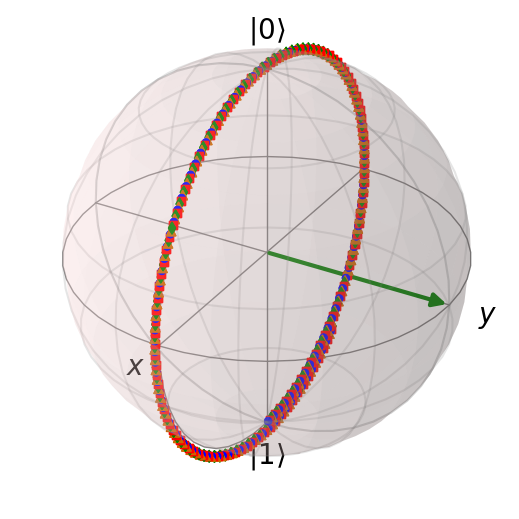

In [5]:
import numpy as np
from qutip import Bloch

#create bloch sphere object
b = Bloch()

#define constants
w = 1
u = np.array([0,1,0])

#set up time points, npoints is the amount to discretize
tmin, tmax, npoints = 0, 7, 500
t = np.linspace(tmin, tmax, npoints)
#initialize the s vector for qubits - > I guess we just pick a point?
s_0 = np.array([0,0,-1])

#compute vector s at each time point and add points
s = np.empty((npoints, 3))
s[0] = s_0
for i in range(1, npoints):
    #add onto the s vector by solving out the s dot and adding it and multiplying it by time difference IE. integral to solve for the s vector to add onto the complete s path.
    s[i] = s[i-1] + w * np.cross(u, s[i-1]) * (t[i]-t[i-1])
    b.add_points(s[i])
vec = [0,1,0] #get sdot vector
b.add_vectors(vec)
b.show()




(b) Show that the same equation can be expressed in the form

$$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$

and find an explicit expression for the matrix $\mathbf{M}$

#### Solution
- proof inspired by [link here](https://i.sstatic.net/5LAsR.png)

We can define the hamiltonian as $\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$

We can expand the hamiltonian using Einstein summation convention we get $\hat{H} = \frac{\hbar\omega}{2}\begin{bmatrix} \mathbf{u}_z & -\mathbf{u}_x-{\rm i}\mathbf{u}_y \\\ \mathbf{u}_x+{\rm i}\mathbf{u}_y & -\mathbf{u}_z \end{bmatrix}$

$\frac{\mathrm{d} s}{\mathrm{d} t} = \frac{1}{{\rm i}\hbar}[\hat{s},\hat{H}] = \frac{\omega}{2{\rm i}}([\mathbf{s}_x, H]\hat{i} + [\mathbf{s}_y, H]\hat{j} + [\mathbf{s}_z, H]\hat{k})$

Using the source provided in the proof, we get the expanded values for each part of the complete vector

$[\mathbf{s}_x, H] = [2{\rm i}\mathbf{u}_y\mathbf{s}_z - 2{\rm i}\mathbf{u}_z\mathbf{s}_y]$
$[\mathbf{s}_y, H] = [-2{\rm i}\mathbf{u}_x\mathbf{s}_z + 2{\rm i}\mathbf{u}_z\mathbf{s}_x]$
$[\mathbf{s}_z, H] = [2{\rm i}\mathbf{u}_x\mathbf{s}_y - 2{\rm i}\mathbf{u}_y\mathbf{s}_x]$

When looking back at the vector form of the s time derivative equation we can see a cross product between $\mathbf{s}$ and $\mathbf{U}$, therefore we prove that:

$\frac{\mathrm{d} s}{\mathrm{d} t} = \omega \mathbf{u} \times \mathbf{s}$

Now, we need to find matrix $M$.

We can turn a cross product into dot product using skew symmetric matrix

$\frac{\mathrm{d} s}{\mathrm{d} t} = \begin{pmatrix} \omega\mathbf{u}_x \\\ \omega\mathbf{u}_y \\\ \omega\mathbf{u}_z \end{pmatrix}  \times \begin{pmatrix} \mathbf{s}_x \\\ \mathbf{s}_y \\\ \mathbf{s}_z \end{pmatrix} $

$ \frac{\mathrm{d} s}{\mathrm{d} t} = \begin{pmatrix} 0 & -\omega\mathbf{u}_z & \omega\mathbf{u}_y \\\ \omega\mathbf{u}_z & 0 & -\omega\mathbf{u}_x \\\ -\omega\mathbf{u}_y & \omega\mathbf{u}_x & 0 \end{pmatrix}  \cdot \begin{pmatrix} \mathbf{s}_x \\\ \mathbf{s}_y \\\ \mathbf{s}_z \end{pmatrix}$

We have our matrix M! 



(c) Convince yourself that the explicit solution of the above equation is 

$$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$

Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$

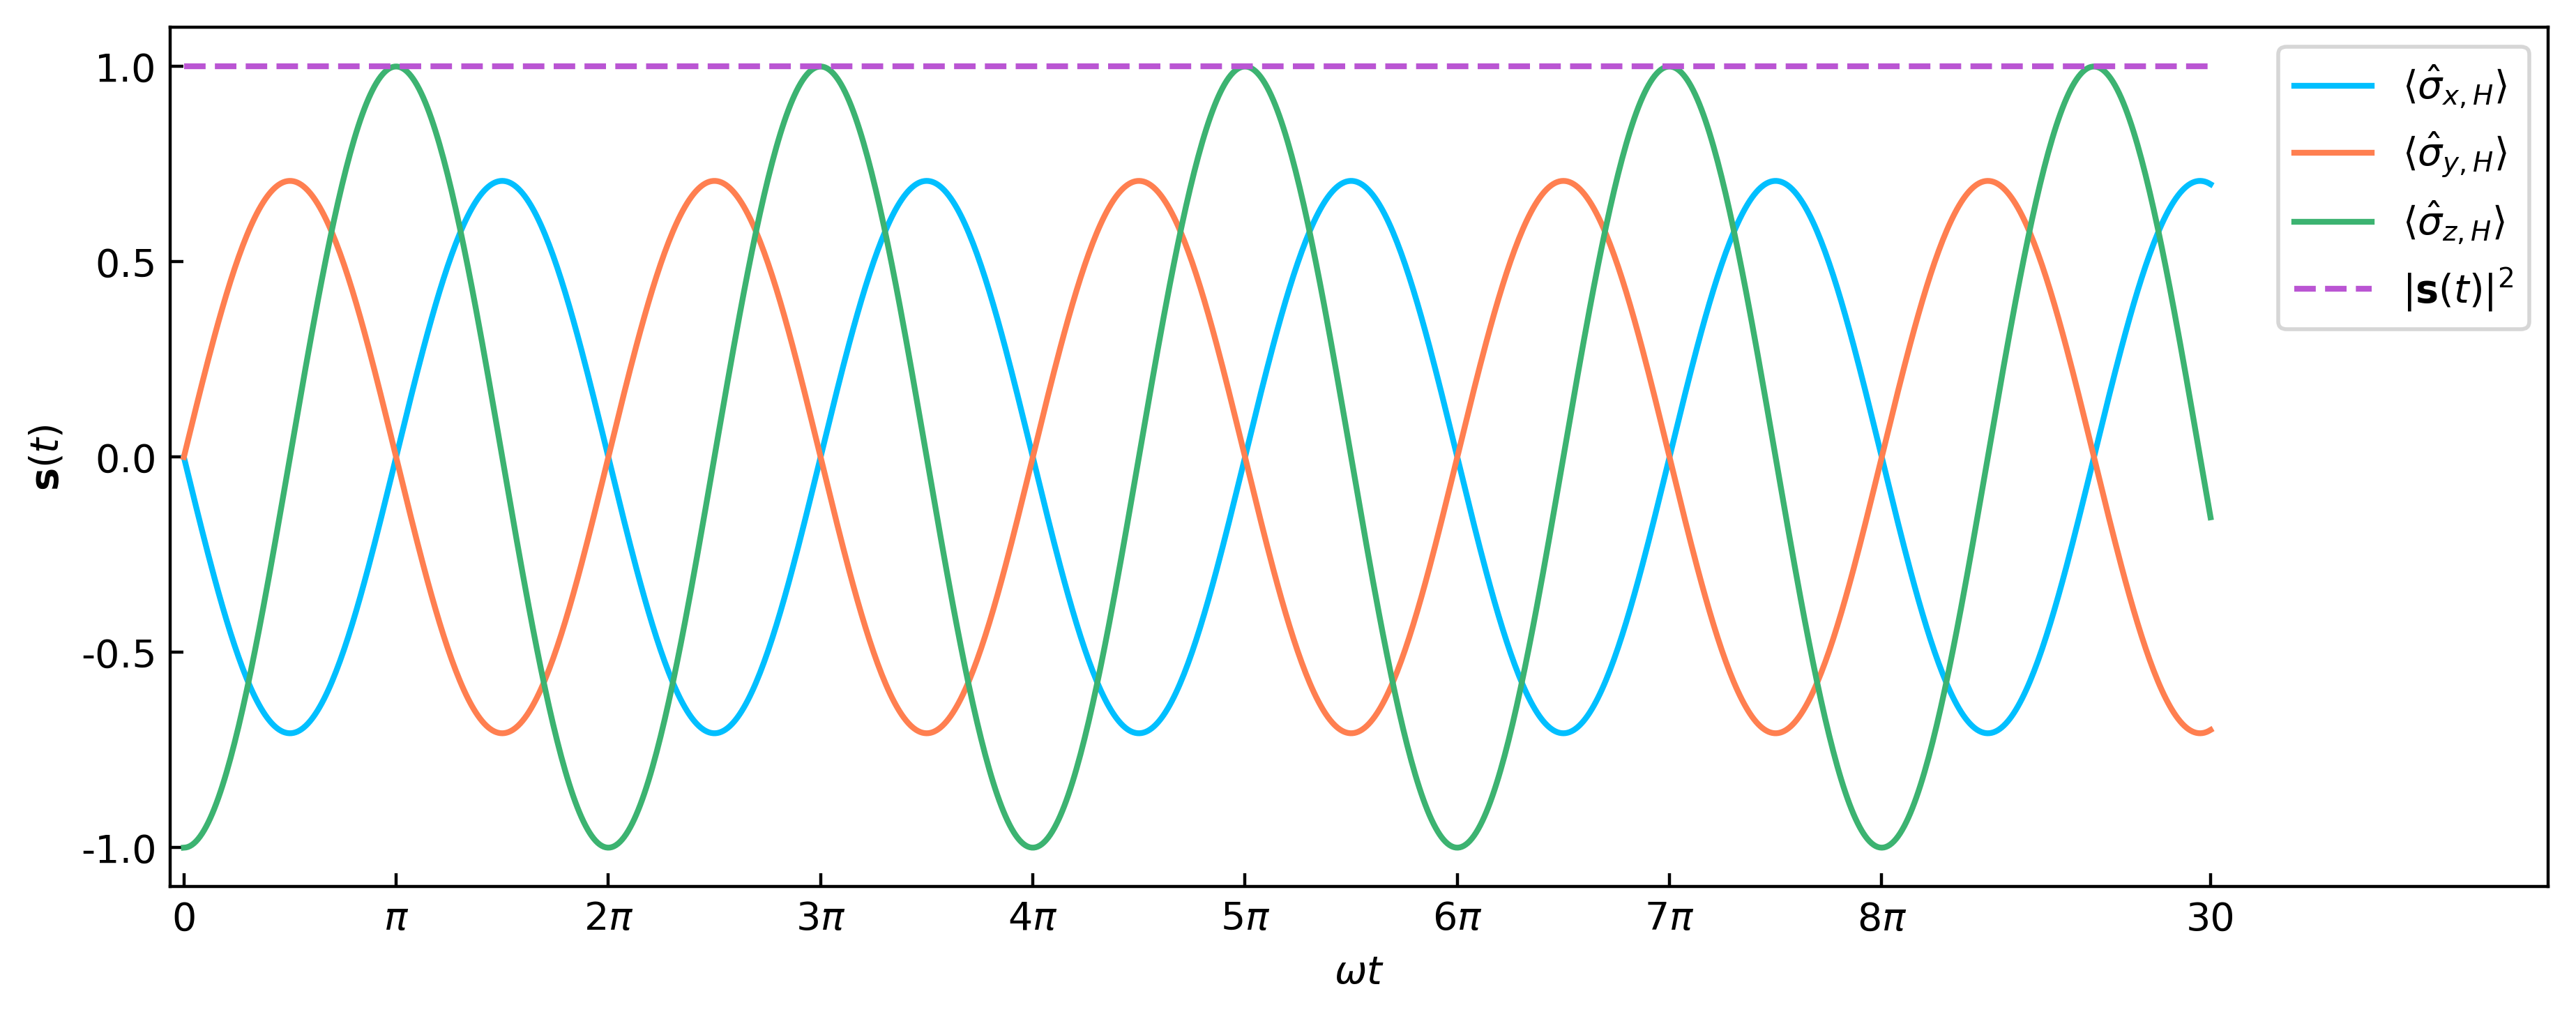

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#define constants
hw = 0.2
t_f = 30/hw #final value
N = 1000 #amount to discretize
wt = np.linspace(0,t_f, N)
initial_state = np.array([[0],
                          [1]])
#u vector from previous question
u = 1/np.sqrt(2) * np.array([[1, 1, 0]])
#matrix defined from previous part
M = hw * np.array([[0, -u[0][2], u[0][1]], 
             [u[0][2], 0, -u[0][0]],
             [-u[0][1], u[0][0], 0]])

#pauli matrices and identity
oX = np.array([[0, 1], [1, 0]])
oY = np.array([[0, -1j], [1j, 0]])
oZ = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#as defined in the equation above
def evolution_s(time, s_vector, M):
    s = expm(time * M) @ s_vector
    return s
#function that calculates the expectation value for the s_vector as the values of the s vector are defined above as part of the expecation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

#define s vector
s_vector = np.array([[expectation_value(initial_state, oX)],
                    [expectation_value(initial_state, oY)],
                    [expectation_value(initial_state, oZ)]])
#calculate the results as the final vector:
all_vectors = [evolution_s(i, s_vector, M) for i in wt]
plt.figure(figsize = (11,4), dpi=400)
#plot of the first component of s at every time:
plt.plot(wt, [i[0][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{x,H}\rangle$', c='deepskyblue')
#plot of the second component of s at every time:
plt.plot(wt, [i[1][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{y,H}\rangle$', c='coral')
#plot of the third component of s at every time:
plt.plot(wt, [i[2][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{z,H}\rangle$', c='mediumseagreen')
#plot of the modulus squared of s at every time -> probability(?)
plt.plot(wt, [i[0][0]**2 + i[1][0]**2 + i[2][0]**2 for i in all_vectors], label = r'$|\mathbf{s}(t)|^2$', c='mediumorchid', linestyle='--')

plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\mathbf{s}(t)$')
plt.xticks([np.pi * i/hw for i in range(9)]+[30/hw], ['0', r'$\pi$']+[r'$'+str(i+2)+'\pi$' for i in range(7)]+['30'])
plt.yticks([-1, -0.5, 0, 0.5, 1], [str(i/2 - 1) for i in range(5)])

plt.xlim((-1, 35/hw))
plt.legend()
plt.tick_params(axis="both", direction="in")
plt.show()